## Observations of Pairwise comparisons (Abla)

##### There is significant difference among all the companies in terms of work balance except for 1 pair: netflix and apple.
##### There is significant difference among all the companies in terms of culture values and senior management except for 2 pairs: netflix-amazon and microsoft-netflix.
##### There is significant difference among all the companies in terms of overall ratings except for 2 pairs: netflix-amazon and google-facebook.
##### All pairwise comparisons among the companies in terms of career opportunities and the benefits showed significant difference between all the pairs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from function_creation import draw_chart,draw_chart2, print_label, calc_means, calc_sems, count_sample

In [2]:
#read, select, and rename the columns
df = pd.read_csv("employee_reviews.csv",encoding="utf-8")
df=df[['Unnamed: 0','company', 'location','dates','job-title','overall-ratings','work-balance-stars','culture-values-stars','carrer-opportunities-stars','comp-benefit-stars','senior-mangemnet-stars']]
df=df.rename(columns={'Unnamed: 0':'0','job-title':'emp_status','overall-ratings':'overall_rating', 'work-balance-stars':'work_balance','culture-values-stars':'culture_values','carrer-opportunities-stars':'career_opp','comp-benefit-stars':'benefits', 'senior-mangemnet-stars':'Senior_mgmt'})
df.head(2)

,0,company,location,dates,emp_status,overall_rating,work_balance,culture_values,career_opp,benefits,Senior_mgmt
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,4.0,2.0,3.0,3.0,5.0,3.0


In [3]:
# clean, split, and keep only the year of 'dates' column
df['overall_rating'].value_counts()
df['dates'].dropna(inplace = True) 
df[['date','year']]=df['dates'].str.split( ", ", expand=True)
df1=df.drop(['dates','date'], axis=1)

df1=df1[df1['year'] != '0000'] 
df1=df1[df1['year'] !=  None]  

df1.head(2) 

,0,company,location,emp_status,overall_rating,work_balance,culture_values,career_opp,benefits,Senior_mgmt,year
0,1,google,none,Current Employee - Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0,2018
1,2,google,"Mountain View, CA",Former Employee - Program Manager,4.0,2.0,3.0,3.0,5.0,3.0,2013


In [4]:
# split the 'title' column into 'status' and 'position' columns
# drop the 'title' column
a= df1['emp_status'].str.split( " - ", expand=True)
df1['status']=a[0]
df1['position']=a[1]
df2=df1.drop(['emp_status'], axis=1)
df2.head(2)

,0,company,location,overall_rating,work_balance,culture_values,career_opp,benefits,Senior_mgmt,year,status,position
0,1,google,none,5.0,4.0,5.0,5.0,4.0,5.0,2018,Current Employee,Anonymous Employee
1,2,google,"Mountain View, CA",4.0,2.0,3.0,3.0,5.0,3.0,2013,Former Employee,Program Manager


In [5]:
#  reorder the columns and dropping NanS
df3=df2[['0','company', 'location','year','status','position','overall_rating',
         'work_balance','culture_values','career_opp','benefits','Senior_mgmt']]

df3["work_balance"] = pd.to_numeric(df["work_balance"], errors = "coerce")
df3["overall_rating"] = pd.to_numeric(df["overall_rating"], errors = "coerce")
df3["culture_values"] = pd.to_numeric(df["culture_values"], errors = "coerce")
df3["career_opp"] = pd.to_numeric(df["career_opp"], errors = "coerce")
df3["benefits"] = pd.to_numeric(df["benefits"], errors = "coerce")
df3["Senior_mgmt"] = pd.to_numeric(df["Senior_mgmt"], errors = "coerce")
df3 = df3.dropna(how = "any")
df3.count()
df3.head(100)

df3.head()

,0,company,location,year,status,position,overall_rating,work_balance,culture_values,career_opp,benefits,Senior_mgmt
0,1,google,none,2018,Current Employee,Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0
1,2,google,"Mountain View, CA",2013,Former Employee,Program Manager,4.0,2.0,3.0,3.0,5.0,3.0
2,3,google,"New York, NY",2014,Current Employee,Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0
3,4,google,"Mountain View, CA",2015,Current Employee,Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0
4,5,google,"Los Angeles, CA",2018,Former Employee,Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0


In [8]:
# Subsetting df3 by year 2013-2018
yearsdf3 = df3.loc[df3["year"].isin(["2014", "2015", "2016", "2017", "2018"])]
yearsdf3.head()

,0,company,location,year,status,position,overall_rating,work_balance,culture_values,career_opp,benefits,Senior_mgmt
0,1,google,none,2018,Current Employee,Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0
2,3,google,"New York, NY",2014,Current Employee,Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0
3,4,google,"Mountain View, CA",2015,Current Employee,Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0
4,5,google,"Los Angeles, CA",2018,Former Employee,Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0
5,6,google,"Mountain View, CA",2018,Former Employee,SDE2,5.0,4.0,4.0,4.0,5.0,4.0


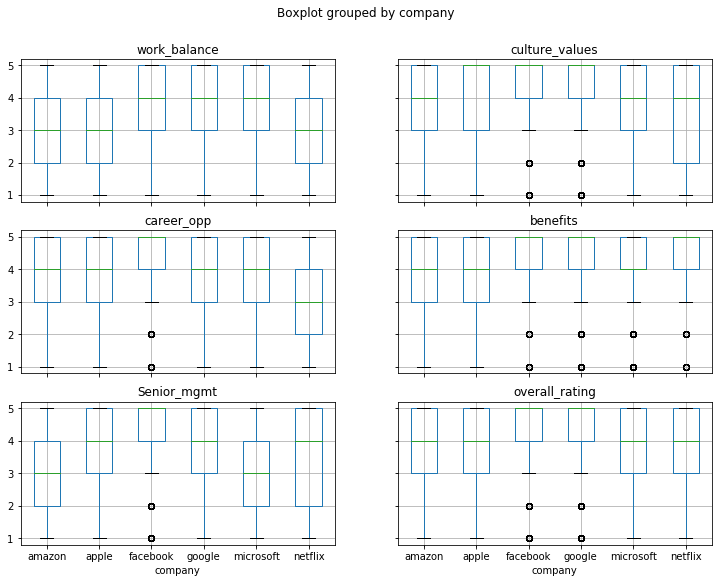

In [10]:
# Create a boxplot to compare means
yearsdf3.boxplot(column=["work_balance", "culture_values", "career_opp", "benefits", "Senior_mgmt", "overall_rating"], by="company", figsize = (12, 9))
plt.savefig("boxplots.png")
plt.show()

In [20]:
def anova_turkey(col_name):
    # Extract individual groups
    group1 = yearsdf3[yearsdf3["company"] == "amazon"][col_name]
    group2 = yearsdf3[yearsdf3["company"] == "apple"][col_name]
    group3 = yearsdf3[yearsdf3["company"] == "facebook"][col_name]
    group4 = yearsdf3[yearsdf3["company"] == "google"][col_name]
    group5 = yearsdf3[yearsdf3["company"] == "microsoft"][col_name]
    group6 = yearsdf3[yearsdf3["company"] == "netflix"][col_name]

    # Perform the ANOVA
    anova=stats.f_oneway(group1, group2, group3, group4, group5, group6)
    print(f"\n")
    print(anova)
    print(f"\n")

    # Running pairwise comparisons
    var_mc = MultiComparison(yearsdf3[col_name], yearsdf3['company'])
    result = var_mc.tukeyhsd()

    print(result)
    print(var_mc.groupsunique)

In [19]:
anova_turkey('work_balance')

F_onewayResult(statistic=668.1186336920713, pvalue=0.0)


 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower   upper  reject
---------------------------------------------------
  amazon    apple    0.3192   0.2736  0.3648  True 
  amazon   facebook  0.843    0.7344  0.9516  True 
  amazon    google   0.9867   0.9294  1.044   True 
  amazon  microsoft  0.5832   0.5402  0.6263  True 
  amazon   netflix   0.221    0.0383  0.4037  True 
  apple    facebook  0.5238   0.4115  0.636   True 
  apple     google   0.6675   0.6035  0.7315  True 
  apple   microsoft  0.264    0.2123  0.3156  True 
  apple    netflix  -0.0982  -0.2832  0.0867 False 
 facebook   google   0.1437   0.0262  0.2612  True 
 facebook microsoft -0.2598   -0.371 -0.1485  True 
 facebook  netflix   -0.622  -0.8316 -0.4124  True 
  google  microsoft -0.4035  -0.4657 -0.3413  True 
  google   netflix  -0.7657  -0.9539 -0.5775  True 
microsoft  netflix  -0.3622  -0.5465 -0.1779  True 
------

In [23]:
anova_turkey("culture_values")



F_onewayResult(statistic=565.468676689026, pvalue=0.0)


 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower   upper  reject
---------------------------------------------------
  amazon    apple    0.5651    0.52   0.6101  True 
  amazon   facebook  0.9448   0.8376  1.052   True 
  amazon    google   0.8209   0.7643  0.8774  True 
  amazon  microsoft  0.1742   0.1317  0.2167  True 
  amazon   netflix   0.0506  -0.1299  0.231  False 
  apple    facebook  0.3798   0.2689  0.4906  True 
  apple     google   0.2558   0.1926  0.319   True 
  apple   microsoft -0.3909  -0.4419 -0.3399  True 
  apple    netflix  -0.5145  -0.6971 -0.3319  True 
 facebook   google   -0.124   -0.24   -0.008  True 
 facebook microsoft -0.7707  -0.8805 -0.6608  True 
 facebook  netflix  -0.8943  -1.1012 -0.6873  True 
  google  microsoft -0.6467  -0.7081 -0.5853  True 
  google   netflix  -0.7703  -0.9561 -0.5845  True 
microsoft  netflix  -0.1236  -0.3056  0.0584 False 
-----

In [24]:
anova_turkey("career_opp")



F_onewayResult(statistic=259.2072941717577, pvalue=2.563342014303585e-274)


 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower   upper  reject
---------------------------------------------------
  amazon    apple   -0.1847  -0.2284  -0.141  True 
  amazon   facebook  0.715    0.611   0.819   True 
  amazon    google   0.4357   0.3808  0.4906  True 
  amazon  microsoft  0.097    0.0558  0.1382  True 
  amazon   netflix  -0.4223  -0.5973 -0.2472  True 
  apple    facebook  0.8997   0.7922  1.0073  True 
  apple     google   0.6204   0.5591  0.6817  True 
  apple   microsoft  0.2817   0.2322  0.3312  True 
  apple    netflix  -0.2376  -0.4147 -0.0604  True 
 facebook   google  -0.2793  -0.3919 -0.1668  True 
 facebook microsoft  -0.618  -0.7246 -0.5115  True 
 facebook  netflix  -1.1373  -1.3381 -0.9366  True 
  google  microsoft -0.3387  -0.3983 -0.2791  True 
  google   netflix   -0.858  -1.0382 -0.6777  True 
microsoft  netflix  -0.5193  -0.6959 

In [ ]:
anova_turkey("benefits")

In [ ]:
anova_turkey("Senior_mgmt")

In [ ]:
anova_turkey("overall_rating")